In [86]:

import numpy as np
import mrcfile
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib as mpl
import zarr

In [2]:
filename = '/Users/atchen/Downloads/50451_downsampled_bin10.mrc'

mrc = mrcfile.mmap(filename, mode='r+')

In [8]:
mrc.data.shape

(659, 1533, 1017)

In [12]:
mrc.data[:, :, 0].shape

(659, 1533)

In [23]:
np.array(mrc.data[:, :, 0])

array([[126, 126, 126, ..., 126, 126, 126],
       [126, 126, 126, ..., 126, 126, 126],
       [126, 126, 126, ..., 126, 126, 126],
       ...,
       [126, 126, 126, ..., 126, 126, 126],
       [126, 126, 126, ..., 126, 126, 126],
       [126, 126, 126, ..., 126, 126, 126]], dtype=int8)

In [29]:
Image(np.array(mrc.data[:, :, 0]))

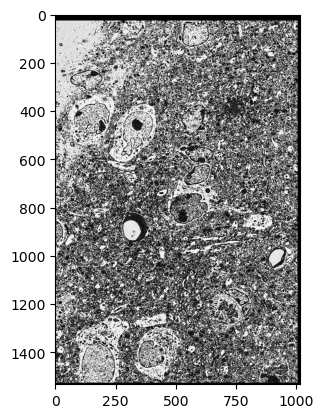

In [42]:
plt.imshow(np.array(mrc.data[0, :, :]), cmap=mpl.cm.gray_r)
plt.show()

/var/folders/1q/khpcygc10_ggt2mxhm1wdwg00000gn/T/ipykernel_17332/937666319.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


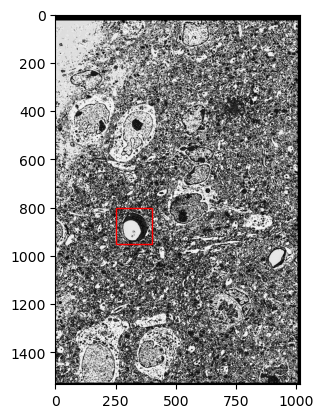

In [48]:
ec1_x1 = 250
ec1_y1 = 800
ec1_width = 150
ec1_height = 150

fig, ax = plt.subplots()
ax.imshow(np.array(mrc.data[0, :, :]), cmap=mpl.cm.gray_r)
rec = mpl.patches.Rectangle((ec1_x1, ec1_y1), ec1_width, ec1_height, fill=False, edgecolor='red', linewidth=1)
ax.add_patch(rec)

fig.show()

/var/folders/1q/khpcygc10_ggt2mxhm1wdwg00000gn/T/ipykernel_17332/735942157.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


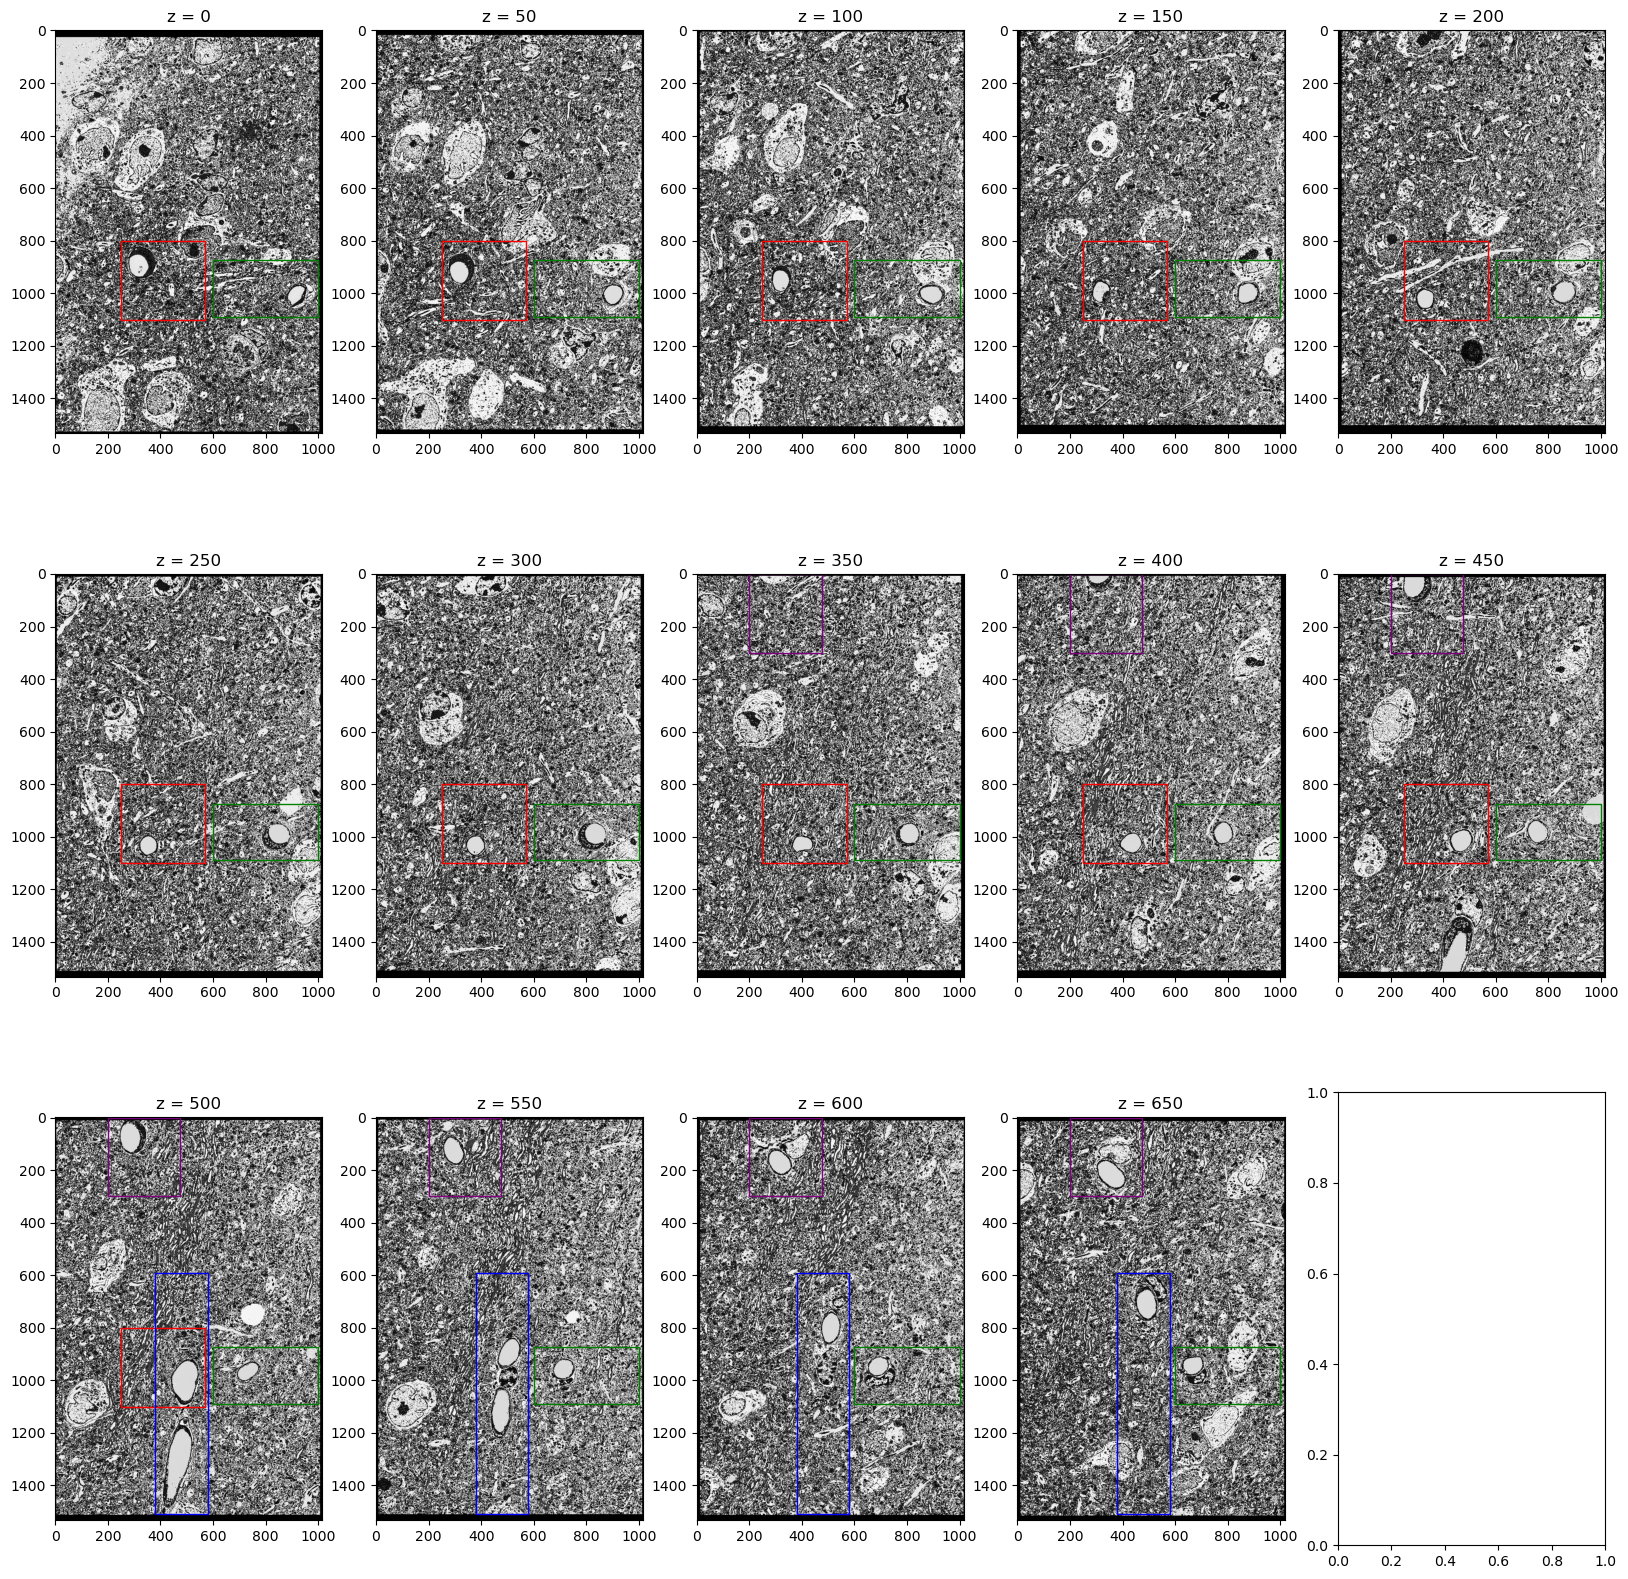

In [85]:
n_z = mrc.data.shape[0]
step = 50
n_steps = int(n_z / step) + 1

ncols = 5
nrows = int(n_steps / ncols) + 1

# x, y, width, height, color, z_start, z_end
ecs = [
    (250, 800, 320, 300, 'red', 0, 500), 
    (380, 590, 200, 920, 'blue', 500, n_z),
    (600, 875, 400, 215, 'green', 0, n_z),
    (200, 0, 275, 300, 'purple', 350, n_z),
]

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
for i, z in enumerate(range(0, n_z, step)):
    ax = axes[int(i / ncols), i % ncols]
    ax.imshow(np.array(mrc.data[z, :, :]), cmap=mpl.cm.gray_r)
    # recs = []
    for ec in ecs:
        if not (ec[5] <= z <= ec[6]):
            continue
            
        rec = mpl.patches.Rectangle((ec[0], ec[1]), ec[2], ec[3], fill=False, edgecolor=ec[4], linewidth=1)
        ax.add_patch(rec)

    ax.set_title(f'z = {z}')

fig.show()

In [87]:
for i, ec in enumerate(ecs):
    x1 = ec[0]
    y1 = ec[1]
    width = ec[2]
    height = ec[3]
    z_start = ec[5]
    z_end = ec[6]

    ec_data = mrc.data[z_start:z_end, y1:y1+height, x1:x1+width]

    mrcfile.write(f'ec_{i}.mrc', ec_data)

In [ ]:
mrc.close()